In [1]:
# Setting for Notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
import sklearn

from skimage import io
import skimage

import pandas as pd
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

import time


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Dataset-1

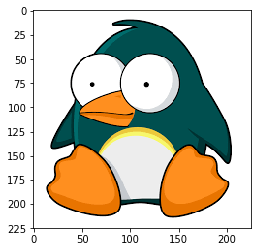

In [3]:
# Display simple image
im = io.imread('https://s3.amazonaws.com/aq-web-library/cartoon.png')
plt.imshow(im/np.max(im))
plt.show()

---
### Problem 1:

Find the color-clusters using the k-means algorithm in scikit-learn for the above image. To create image something like the image below, how many clusters do you need for perfect reproduction?

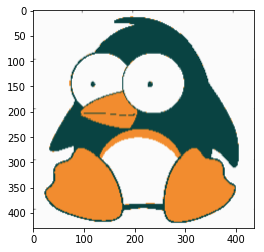

In [4]:
# Display simple image
im_fin = io.imread('https://s3.amazonaws.com/aq-web-library/cartoon_repro.png')
plt.imshow(im_fin)
plt.show()

In [5]:
# Format data
m,n = im.shape[:2]
data = im.reshape(m*n,3)
data = np.array(data, dtype = float)

In [6]:
###Solution for problem-1 Starts Here

#using k-means to cluster pixels
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)

#the cluster centers are our dominant colors.
colors = kmeans.cluster_centers_
colors=colors.astype(int)

In [7]:
# We used Elbow Curve to determine the most optimal number of centers.

In [8]:
distortions = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)

Text(0.5,1,'Elbow curve')

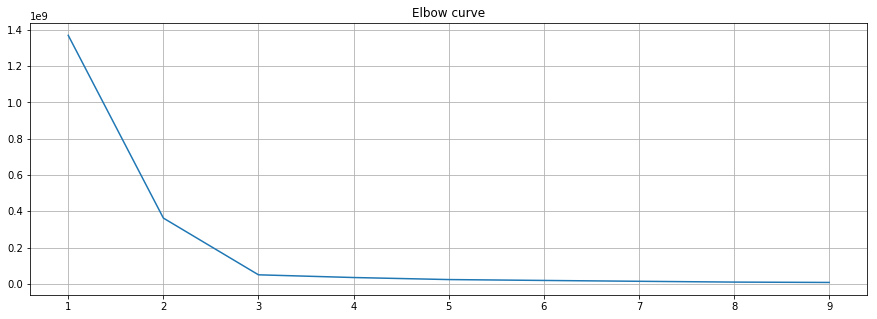

In [9]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')

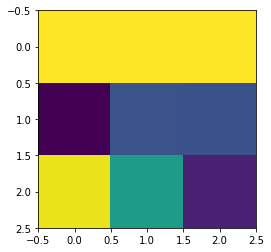

[[251 251 251]
 [  4  67  66]
 [244 140  27]]


In [10]:
# print kmeans.cluster_centers_
plt.imshow(colors)
plt.show()
print(colors)

### Solution Ends Here

# Dataset-2

In [11]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/athlete_events.csv.zip")
zipfile = ZipFile(BytesIO(resp.read()))
df = pd.read_csv(zipfile.open('athlete_events.csv'))

In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


---
### Problem 2:
* What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? 

Hint:* drop duplicated sportsmen, count only unique ones. 


In [13]:
### Solution for problem-2 Starts Here

df_M_2000 = df[(df.Year==2000) & (df.Sex=='M')]  # Filter data for all the male participants of the 2000 Olympics

df_uniq = df_M_2000.drop_duplicates(subset='ID') # Eliminate duplicate sportsmen
Total_participants = df_uniq.shape[0]

df_gymnast = df_uniq[(df_uniq.Sport=='Gymnastics')] # Calculate total male gymnasts among all the male participants of the 2000 Olympics
Gymnasts = df_gymnast.shape[0]

# the percentage of male gymnasts among all the male participants of the 2000 Olympics
print("The percentage of male gymnasts among all the male participants of the 2000 Olympics :" , (Gymnasts/Total_participants)*100)

### Solution Ends Here

The percentage of male gymnasts among all the male participants of the 2000 Olympics : 1.4743882048943608


### Problem 3:
What age category did the fewest and the most participants of the 2014 Olympics belong to?
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45) and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

In [14]:
### Solution for problem-3 Starts Here
Age_Group=[]
for x in df['Age']:
    if x<15:
        Age_Group.append('Less than 15')
    elif x>=15 and x<25:
        Age_Group.append('[15-25)')
    elif x>=25 and x<35:
        Age_Group.append('[25-35)')
    elif x>=35 and x<45:
        Age_Group.append('[35-45)')
    elif x>=45 and x<=55:
        Age_Group.append('[45-55]')
    else:
        Age_Group.append('More than 55')

In [15]:
df['Age_Group']=Age_Group
df['Age_Group'].value_counts()

[15-25)         130057
[25-35)         110991
[35-45)          15111
More than 55     10503
[45-55]           3377
Less than 15      1077
Name: Age_Group, dtype: int64

In [16]:
# Answer
print("[45-55] and [15-25) correspondingly")

### Solution Ends Here

[45-55] and [15-25) correspondingly


### Problem 4:
There are 7 people in the room. Each of them individually can correctly determine whether the ball inside box is red or white with 80% probability. How likely is the all will make a correct prediction jointly if the decision is made by majority voting?

In [17]:
### Solution for problem-4 Starts Here

# Function for combinations
def combinations(n,r):
    N= np.math.factorial(n)
    R= np.math.factorial(r)
    N_R= np.math.factorial(n-r)
    nCr= N/(R*N_R)
    return int(nCr)

In [18]:
# Function for majority's probability
def majprob(n,r,indv_Succ_prob):
    return combinations(n,r) * pow(indv_Succ_prob,r) * pow(1-indv_Succ_prob,n-r)

In [19]:
# considering all majority cases i.e when 4 or more than that are correct:
#Given
indv_Succ_prob=0.8
res = []

for i in range(4,8):
    res.append(majprob(7,i,indv_Succ_prob))
    
print("Probability that all will make a correct prediction jointly if the decision is made by majority voting:", sum(res))

### Solution Ends Here

Probability that all will make a correct prediction jointly if the decision is made by majority voting: 0.9666560000000001


### Problem 5:
Find the value of ∂f/∂x is from network below

Hint: X and + are operators inside nodes

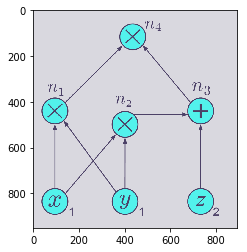

In [20]:
im = io.imread('https://s3.amazonaws.com/aq-web-library/test1.png')
plt.imshow(im/np.max(im))
plt.show()

In [21]:
### Solution for Problem-5 Starts here:

For the given computation graph derivative can be calculated using backpropagation algorithm which use chain rule:
![title](ChainRule.jpeg)

The partial derivative of computation graph w.r.t 'x' xan also be find using mathematics:
![title](Solution.jpeg)
 


In [22]:
### Solution Ends here

### Problem 6:

Multinomial Logistic Regression

* Using logistic regression predict classes by subsetting explanatory variable (shouldn't be all variables) with accuracy, precision and recall score and explain what you understood by scores

* How would you avoid overfitting

In [23]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/data.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
df_log = pd.read_csv(zipfile_.open('data.csv'))

In [24]:
df_log.head()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
df_log['class'].unique()

array([1, 2, 3], dtype=int64)

In [26]:
### Solution for problem-6 Starts Here

# define X & Y as independent and dependent Variables respectively:
X = df_log.iloc[:,1:]
Y = df_log.iloc[:,0]

# Create model object:
mul_reg = sklearn.linear_model.LogisticRegression()

#  Split the dataset into train and test set:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model:
mul_reg_cl = mul_reg.fit(x_train,y_train)

# Predict value of y for test-set and store it in y-pred variable:
y_pred = mul_reg_cl.predict(x_test)

# Obtain the report of your model:
print(sklearn.metrics.classification_report(y_pred=y_pred, y_true= y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        21
          3       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        54



#### As we can clearly see that model has been overfitted. Now we will try to avoid the overfitting in the model. To do that we have different techniques:

In [27]:
# Defining a function to select low variance features:
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [28]:
# Selecting independent variables using the variance threshold function:
X=variance_threshold_selector(X,threshold=0.5)

In [29]:
# Split the dataset into train and test set:
x_train, x_test, y_train, y_test= sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit the model:
mul_reg_cl = mul_reg.fit(x_train,y_train)

# Predict value of y for test-set and store it in y-pred variable:
y_pred = mul_reg_cl.predict(x_test)

# Obtain the report of your model:
print(sklearn.metrics.classification_report(y_pred=y_pred, y_true= y_test))

### Solution Ends Here

             precision    recall  f1-score   support

          1       0.95      1.00      0.97        19
          2       1.00      0.95      0.98        21
          3       1.00      1.00      1.00        14

avg / total       0.98      0.98      0.98        54



# Conclusion:
*There are various other techniques to avoid overfitting. Variance Trade-off is one of the most popular Regularization methods used to handle overfitting. Some other regularization methods are L1 and L2 regularization. Depending on the scenario, we can also increase the dataset size or can use early stopping technique to avoid overfitting.*

### Problem 7:

**Problem**

Predict presence or absence of cardiovascular disease using the patient examination results.

**Data description**


| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


Task:
* use dummy-encoding or One Hot Encoding (OHE), Feature Engineering
* Split data into train and holdout parts in the proportion of 70%/30% using sklearn.model_selection.train_test_split with random_state=1, into X_train, X_valid, y_train, y_valid

In [30]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/data1.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
df_dt = pd.read_csv(zipfile_.open('data1.csv'),index_col='id', sep=';')

In [31]:
df_dt.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Pre-processing on Data/Task:**

In [32]:
# Converting age into categorical variables:
age=[]
for x in df_dt.age:
    
    if (x/365)<35:
        age.append('Age[less_than_35]')
    
    elif (x/365)>=35 and (x/365)<=45 :
        age.append('Age[35-45]')
        
    elif (x/365)>45 and (x/365)<=55 :
        age.append('Age[46-55]')
    
    else:
        age.append('Age[more than 55]')
df_dt.age= age
res = pd.get_dummies(df_dt.age)
df_dt=pd.concat([df_dt,res],axis=1)
df_dt=df_dt.drop(columns='age')

In [33]:
# Converting Gender into categorical variables:
gender=[]
for x in df_dt.gender:
    if x==1:
        gender.append(0)
    else:
        gender.append(1)

df_dt['gender']=gender

In [34]:
# Converting height into categorical variables:
height=[]
for x in df_dt.height:
    if x<100:
        height.append('Height[Less_than_100]')
    elif  x>=100 and x<=150:
        height.append('Height[100-150]')
    elif  x>150 and x<=200:
        height.append('Height[151-200]')
    else:
        height.append('Height[More_than_200]')

df_dt['height']= height

res1 = pd.get_dummies(df_dt.height)

df_dt=pd.concat([df_dt,res1],axis=1)

df_dt=df_dt.drop(columns='height')

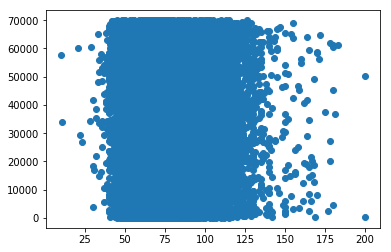

In [35]:
# Before converting weight into categorical variables, we will try to depict variance:
plt.scatter(df_dt.weight,range(len(df_dt.weight)))

In [36]:
# Converting weight into categorical variables:
weight=[]
for x in df_dt.weight:
    if x <50:
        weight.append('Weigth[Less_than_50]')
    elif x>=50 and x<=75:
        weight.append('weight[50-75]')
    elif x>75 and x<=100:
        weight.append('weight[76-100]')
    elif x>100 and x<=125:
        weight.append('weight[101-125]')
    else:
        weight.append('weight[More_than_125]')

df_dt['weight']=weight

res4 = pd.get_dummies(df_dt.weight)

df_dt=pd.concat([df_dt,res4],axis=1)

df_dt=df_dt.drop(columns='weight')

### Before converting 'ap_hi' and 'ap_lo' into categorical variables, refer this image:
![title](basic_blood_pressure_chart.png)

### Instead of converting 'ap_hi' and 'ap_lo' into categorical variables individually, using this image we created categorical ranges of blood pressure which include both high and low blood pressure. 

In [37]:
  
# Converting Blood Pressure into categorical variables:
blood_pressure=[]
for x,y in zip(df_dt.ap_hi,df_dt.ap_lo):
    if x<120 and y<80:
        blood_pressure.append('BP-Normal')
    elif (x>=120 and x<=129) and y<80:
        blood_pressure.append('BP-Elevated')
    elif (x>=130 and x<=180) or (y>=80 and y<=120):
        blood_pressure.append('BP-High BP')
    else:
        blood_pressure.append('BP-Hypertensive Crisis')
        

df_dt['Blood_Pressure']= blood_pressure

df_dt=df_dt.drop(columns=['ap_hi','ap_lo'])

res5 = pd.get_dummies(df_dt.Blood_Pressure)

df_dt=pd.concat([df_dt,res5],axis=1)

df_dt=df_dt.drop(columns='Blood_Pressure')

In [38]:
# Defining Independent and dependent variables:
X= df_dt.drop(columns='cardio') 
Y= df_dt['cardio']

In [39]:
# Split the dataset into train and test dataset:
x_train, x_test, y_train, y_test= sklearn.model_selection.train_test_split(X,Y,random_state=1, train_size=0.7, test_size=0.3 )

#### 7.1 
Train the decision tree on the dataset (X_train, y_train) with max depth equals to 3 and random_state=20.
* What 3 features are used to make predictions in the created decision tree? Calculate accuracy.

In [40]:
### Solution for problem-7.1 Starts Here

# Training a Decision Tree:

decision_tree= sklearn.tree.DecisionTreeClassifier(random_state=20,max_depth=3)
model1= decision_tree.fit(x_train,y_train)
model1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [41]:
# To render the Decision Tree we will import few libraries:

from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

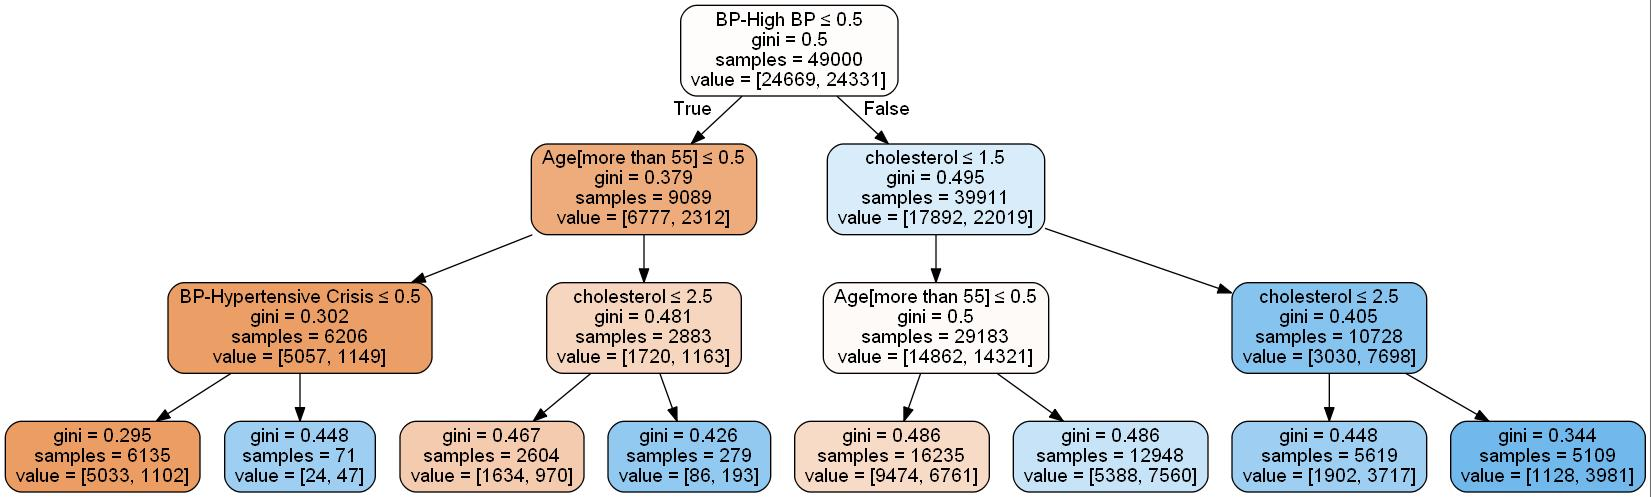

In [42]:
# Rendering Decision tree:

dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=list(x_train.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpeg())

We can determine the 3 features primarily used to make predictions in the created decision tree by seeing at decision tree:
1. BP-High BP
2. Cholestrol
3. Age

To support this result we can also calculate feature ranking.

In [43]:
# Calculate Feature Ranking:
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(x_test.columns)):
    print(f+1,x_test.columns[indices[f]],": ",importances[indices[f]])

Feature ranking:
1 BP-High BP :  0.45675661432781295
2 cholesterol :  0.32548088247628454
3 Age[more than 55] :  0.20636585499876672
4 BP-Hypertensive Crisis :  0.01139664819713582
5 BP-Normal :  0.0
6 gluc :  0.0
7 smoke :  0.0
8 alco :  0.0
9 active :  0.0
10 Age[35-45] :  0.0
11 Age[46-55] :  0.0
12 Age[less_than_35] :  0.0
13 Height[151-200] :  0.0
14 Height[100-150] :  0.0
15 Height[Less_than_100] :  0.0
16 Height[More_than_200] :  0.0
17 Weigth[Less_than_50] :  0.0
18 weight[101-125] :  0.0
19 weight[50-75] :  0.0
20 weight[76-100] :  0.0
21 weight[More_than_125] :  0.0
22 BP-Elevated :  0.0
23 gender :  0.0


In [44]:
# To further analyze the classification and calculate accuracy we will obtain predictions by model1:

y_pred= model1.predict(x_test)

In [45]:
#defining the Confusion matrix function and differnt model evaluation metrics

def Classification_Analysis(cm):
    print('Confusion Matrix : \n', cm)
    total=sum(sum(cm))
    #####from confusion matrix calculate accuracy
    accuracy=(cm[0,0]+cm[1,1])/total
    print ('Accuracy : ', accuracy)

    specificity = cm[0,0]/(cm[0,0]+cm[1,0])
    print('Specificity : ', specificity)

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Sensitivity : ', sensitivity)

    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print('Precision : ', precision)   
    print('\n')
    return;

## ---------------------------------------------------Confusion Matrix---------------------------------------------------
![title](confusion_matrix.jpg)

In [46]:
# Printing Confusion Matrix and related metrics for evaluating the model
cm1DT = sklearn.metrics.confusion_matrix(y_pred=y_pred,y_true=y_test)
Classification_Analysis(cm1DT)

Confusion Matrix : 
 [[6800 3552]
 [3889 6759]]
Accuracy :  0.6456666666666667
Specificity :  0.6361680232014221
Sensitivity :  0.6347670924117205
Precision :  0.6555135292406168




We can also study the ROC curve for the model1:


In [47]:
# Defining ROC-plotting function:

def plot_roc(fpr,tpr,roc_auc, color_curve):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color=color_curve, label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--', label = 'Baseline')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return;

In [48]:
# calculate the fpr and tpr for all thresholds of  decision tree
prob_dt = model1.predict_proba(x_test)
pred_dt = prob_dt[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, pred_dt)
roc_auc = sklearn.metrics.auc(fpr, tpr)

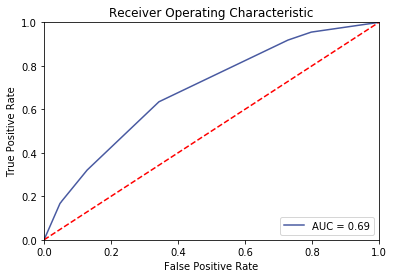

In [49]:
# plotting the roc curve for decision tree
plot_roc(fpr,tpr,roc_auc,'#495aa1')

## Solution Ends here

#### 7.2
Set up the depth of the tree using cross-validation on the dataset `(X_train, y_train)` in order to increase quality of the model. Use `GridSearchCV` with 5 folds. Fix `random_state=20` and change  `max_depth` from 4 to 8.

* Draw the plot to show how mean accuracy is changing in regards to `max_depth` value on cross-validation.

* Print the best value of `max_depth`. Also compute accuracy on holdout data. 

In [50]:
### Solution for problem-7.2 Starts Here

accuracy=[]
maxDepth=[]
for x in range(4,9):
    model_t= sklearn.tree.DecisionTreeClassifier(max_depth=x)
    model_tf= model_t.fit(x_train,y_train)
    y_pred= model_tf.predict(x_test)
    cm= sklearn.metrics.confusion_matrix(y_pred=y_pred,y_true=y_test)
    total=sum(sum(cm))
    acc=(cm[0,0]+cm[1,1])/total
    accuracy.append(acc)
    maxDepth.append(x)
    

Text(0,0.5,'Accuracy')

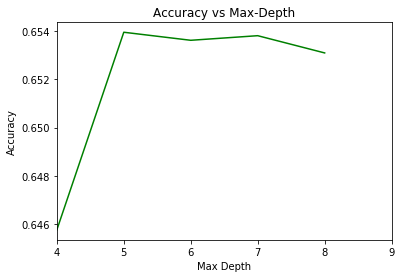

In [51]:
plt.plot(maxDepth, accuracy, '-g')
plt.title('Accuracy vs Max-Depth')
plt.xlim([4,9])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [52]:
parameters={'max_depth': range(4,9)}
clf=sklearn.model_selection.GridSearchCV(decision_tree,parameters,cv=5)
DT_CV=clf.fit(x_train,y_train)

DT_CV.best_estimator_

## Solution Ends here

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

#### 7.3

What conclusions can you derive from model how does these conclusions fit to your understanding cardiovascular disease


In [53]:
### Solution for problem-7.3 Starts Here

# Before drawing conclusions we can study the decision tree with best estimator:
model2= sklearn.tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

DT_best= model2.fit(x_train, y_train)

In [54]:
# Making predictions with model2:
y_pred2= DT_best.predict(x_test)

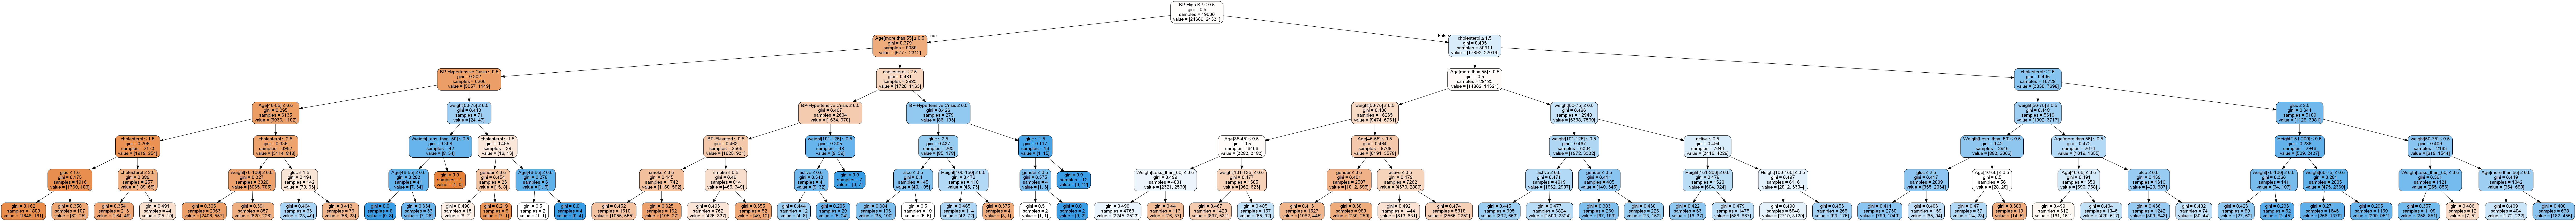

In [55]:
# Rendering Decision tree with best estimator:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=list(x_train.columns))
graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph1.create_png())


In [56]:
# Printing Confusion Matrix and related metrics for evaluating the model
cm2DT = sklearn.metrics.confusion_matrix(y_pred=y_pred2,y_true=y_test)
Classification_Analysis(cm2DT)

Confusion Matrix : 
 [[5910 4442]
 [2832 7816]]
Accuracy :  0.6536190476190477
Specificity :  0.6760466712422787
Sensitivity :  0.7340345604808415
Precision :  0.6376244085495186




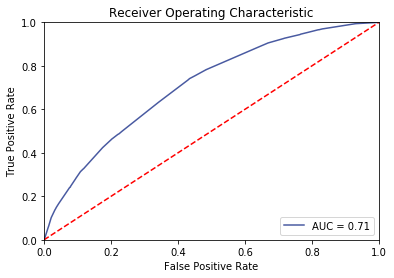

In [57]:
# calculate the fpr and tpr for all thresholds of Random Forest
prob_dt2 = model2.predict_proba(x_test)
pred_dt2 = prob_dt2[:,1]
fpr2, tpr2, threshold2 = sklearn.metrics.roc_curve(y_test, pred_dt2)
roc_auc2 = sklearn.metrics.auc(fpr2, tpr2)

# plotting the roc curve for decision tree
plot_roc(fpr2,tpr2,roc_auc2,'#495aa1')


### _Conclusion:_
*After analyzing two different decision trees we can infer that, in general the factors that are mainly responsible for cardio vascular diseases are Blood Pressure, Age and Cholestrol. People with blood pressure more than 140 or less than 90 are more likely to be prone towards Cardio Vascular Disease. This probability further increase if the person is older than 55. These conclusions fits very precise to what cases are recorded about cardio vascular disease.*

In [58]:
### Solution Ends here.

### Problem 8:
A unit of equipment operates at a temperature that is known to be closely linked to the ambient temperature.

In [59]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/daily_temp.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
daily_temp = pd.read_csv(zipfile_.open('daily_temp.csv'))

#### 8.1 using the following dataframe, construct a time series visual of the equipment temperature 

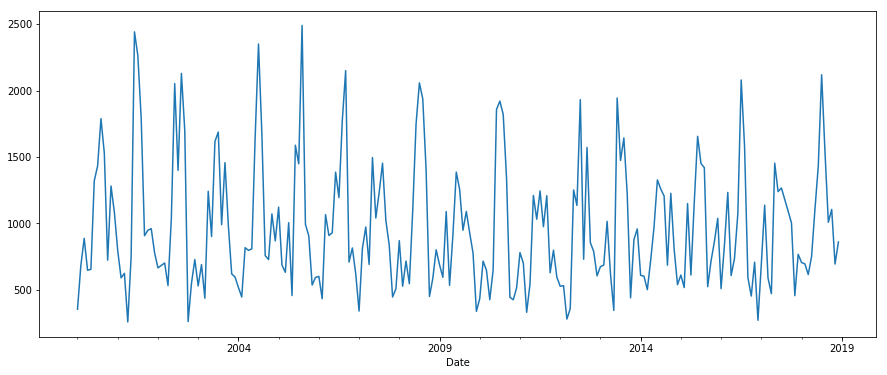

In [60]:
### Solution for problem-8.1 Starts Here

# To get better visualizations we can resample the data monthly.
daily_temp.Date = pd.to_datetime(daily_temp.Date)
df_resampled = daily_temp.resample('M', on='Date').sum()
df_resampled['Equipment Temperature (F)'].plot(figsize=(15, 6))
plt.show()

In [61]:
# Before starting visualization we will set date as index for the dataframe:
daily_temp.set_index('Date', inplace=True)

# Now we will check for null values in the Timeseries:
daily_temp.isnull().sum()

Ambient Temperature (F)      5169
Equipment Temperature (F)    5169
dtype: int64

**Since we have Null values we have two options:**
1. We can remove the null entries and plot the available data
2. We can fill the null values. For now let's fill values by rolling mean.

To retain the data, create different frameworks instead of editing the same.

In [62]:
# 1. Remove the null entries and plot the Equipment Temperature and creating a new data frame:
df_no_null=daily_temp[ 'Equipment Temperature (F)'].dropna()

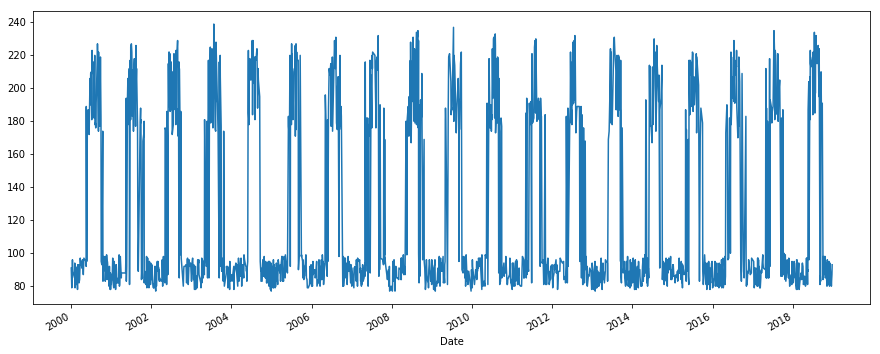

In [63]:
# Visualize Equipment Temperature against date:
df_no_null.plot(figsize=(15, 6))
plt.show()

In [64]:
# 2. Fill null values with rolling mean and create a new data frame:
df_roll_mean = daily_temp['Equipment Temperature (F)'].rolling(12,center=True,min_periods=1).mean()

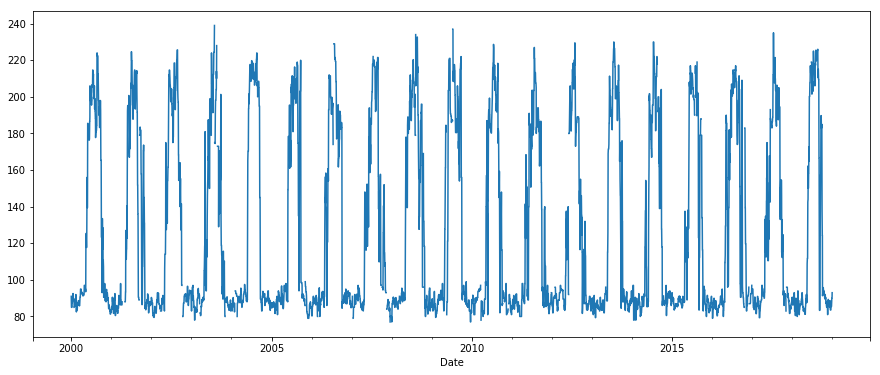

In [65]:
# Visualize Equipment Temperature against date:
df_roll_mean.plot(figsize=(15, 6))
plt.show()

#### 8.2 Some of the equipmentd data is missing. Based on the available data, fill in the gaps in a sensible way. 

In [66]:
### Solution for problem-8.2 Starts Here

# We have already filled null values with rolling mean and is stored in 'df_roll_mean'. Now we will use different interpolate methods to fill the value:
InterpolateTime = daily_temp['Equipment Temperature (F)'].interpolate(method='time')
InterpolatePad = daily_temp['Equipment Temperature (F)'].interpolate(method='pad')
InterpolateTime_resampled = df_resampled['Equipment Temperature (F)'].interpolate(method='time')
InterpolatePad_resampled = df_resampled['Equipment Temperature (F)'].interpolate(method='pad')



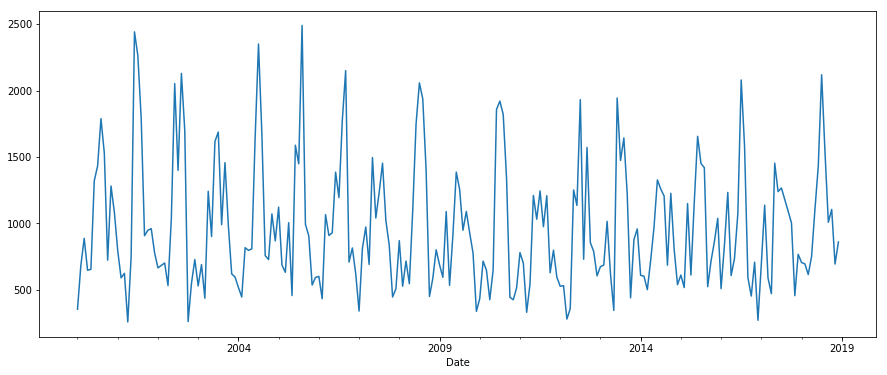

In [67]:
InterpolateTime_resampled.plot(figsize=(15, 6))
plt.show()

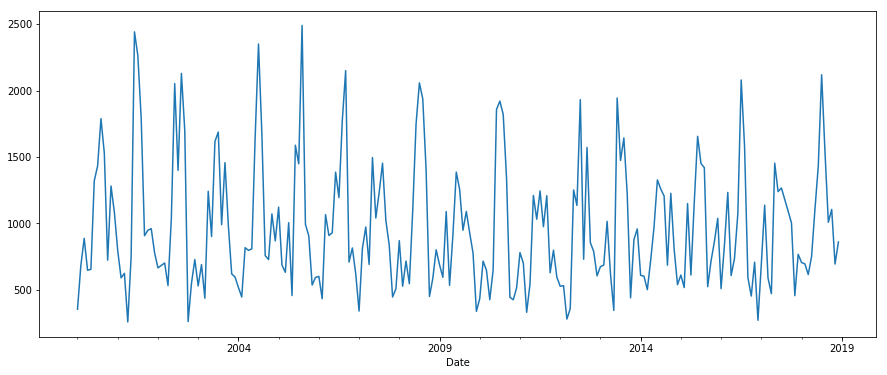

In [68]:
InterpolatePad_resampled.plot(figsize=(15, 6))
plt.show()

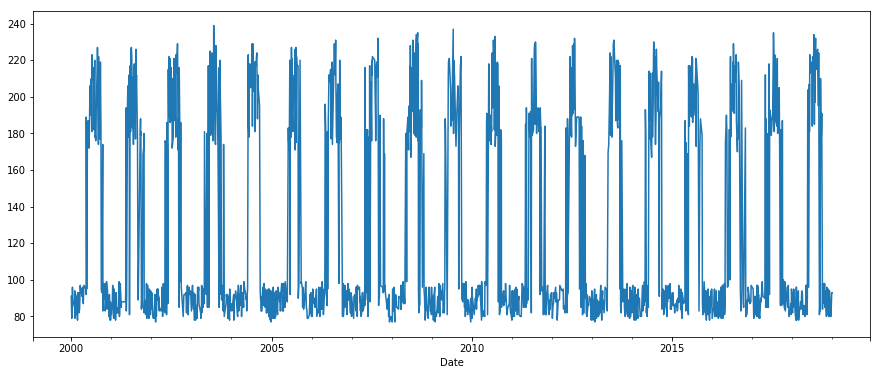

In [69]:
InterpolateTime.plot(figsize=(15, 6))
plt.show()

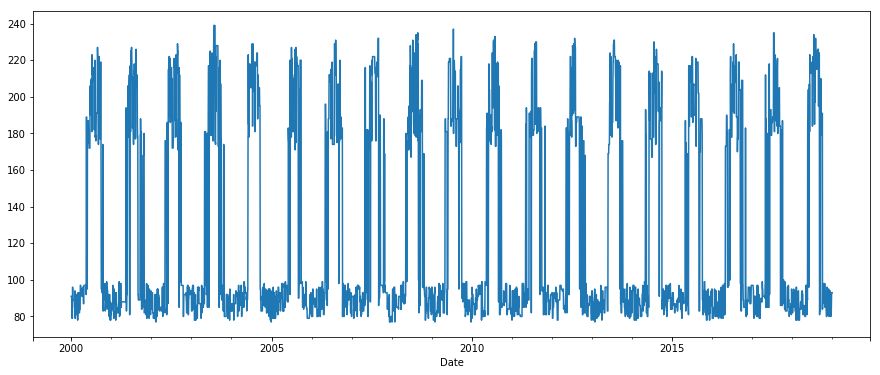

In [70]:
InterpolatePad.plot(figsize=(15, 6))
plt.show()

# Conclusion:
*This timeseries dataset can be visualized in many way and it is recommended to visualize data set before using it to train a model as a visualization gives a better intution about the data-flow or pattern even if there are several missing values in it.*<br />
*Here we have visualized both resampled and raw dataset to explain how resampling technique can be helpful while taking insights from the data. In both visualizations, the summer and winter can be observed and a resampled data visualization gives better picture of this.* 

### Problem 9:

Three files contain 30 days of data collected in January 2019. Merge into a single dataframe.



In [71]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/files.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
files1 = pd.read_csv(zipfile_.open('file1.csv'))
files2 = pd.read_csv(zipfile_.open('file2.csv'))
files3 = pd.read_csv(zipfile_.open('file3.csv'))

In [72]:
### Solution for problem-9 Starts Here

# Before start merging the dataframes we will create a 'Day' column in files2:
Day=[]
for x in files2.time_stamp:
    Day.append(x.split()[0].replace('2019-01-','Jan -').replace('-0','').replace('-',''))
    
files2['Day']=Day

# Since we have 'Day' column common in both dataframes, we can now merge files1 and files2:
f1f2= files1.merge(files2, on='Day')
f1f2

# Similarly we can merge the files3 into df_merge12, using 'PAR1' as common:
f1f2f3= f1f2.merge(files3, on='PAR1')

# Our required single dataframe is:
final= f1f2f3.iloc[:,[3,0,1,2,4,5,6]]
final

### Solution Ends Here

,time_stamp,Day,PAR1,PAR2,PAR3,PAR4,PAR5
0,2019-01-09 01:00:00,Jan 9,10A1,104,15,916,16
1,2019-01-05 00:00:00,Jan 5,44,105,19,500,78
2,2019-01-23 05:00:00,Jan 23,QR,101,13,839,-78
3,2019-01-01 04:00:00,Jan 1,A12,108,14,631,-99
4,2019-01-07 00:00:00,Jan 7,18,100,10,52,77
5,2019-01-15 06:00:00,Jan 15,66,102,10,684,-62
6,2019-01-13 06:00:00,Jan 13,CX3,100,13,694,-88
7,2019-01-12 02:00:00,Jan 12,1A2,103,11,600,-72
8,2019-01-04 00:00:00,Jan 4,74,102,14,643,-52
9,2019-01-06 02:00:00,Jan 6,2313,106,14,490,15


### Problem 10:

Six predictor fields (P1, P2, P3, P4, P5, P6) and one target T field are available in the file train_regression.csv

* Fit a regresion model that will predict T in new data. 

In [73]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/train_regression.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
train_regression = pd.read_csv(zipfile_.open('train_regression.csv'))


In [74]:
train_regression.head()

,P1,P2,P3,P4,P5,P6,T
0,3,2.0,2.07,1147.61,NONE,-97.81,2.22
1,3,10.0,2.81,16475.60,CLEAR,-97.81,4.40
2,3,10.0,2.97,7186.37,CLEAR,-97.81,5.03
3,0,-20.0,2.93,6492.99,YELLOW,-97.82,-0.40
4,5,83.0,2.75,8984.99,SETTLED,-97.81,3.50


In [75]:
### Solution for problem-10 Starts Here
df1= train_regression
df2=pd.get_dummies(df1.P5)
df3=pd.concat([df1,df2], axis=1)
df3=df3.drop(columns='P5')
df4=(df3*100).astype(int)
X = df3.drop(columns='T')
Y = df3['T']
x_train, x_test, y_train, y_test= sklearn.model_selection.train_test_split(X,Y,test_size= 0.3, random_state=42)
reg= sklearn.linear_model.LinearRegression()
reg_model= reg.fit(x_train,y_train)
y_pred= reg_model.predict(x_test)
print(reg_model.intercept_)
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))
# print coefficients
list(zip(list(X.columns), reg_model.coef_))



30.79487215581004
1.6511583647985655


[('P1', -0.0053826793312199165),
 ('P2', 0.00045221703701696104),
 ('P3', 0.04392052866969727),
 ('P4', -1.0865824434290461e-05),
 ('P6', 0.2908411160434363),
 ('CLEAR', -0.028344150536795606),
 ('CLOUDY', -0.03285407958987471),
 ('MIXED', 0.03987103255069396),
 ('MURKY', 0.08021353326451629),
 ('NONE', -0.003925808619094827),
 ('SETTLED', -0.027267449259181592),
 ('YELLOW', -0.027693077810263294)]

## Optional

### Problem 11:

Find a fast way to apply the given function (some_function) to each row of the data contained in the file ABCD.csv

In [76]:
resp = urlopen("https://s3.amazonaws.com/aq-web-library/ABCD.csv.zip")
zipfile_ = ZipFile(BytesIO(resp.read()))
ABCD = pd.read_csv(zipfile_.open('ABCD.csv'))


In [77]:
def some_function(A,B,C,D):
    #print(type(A))
    i1 = np.sin(A/2)+np.cos(B/3)*np.cos(C)+np.sin(D)
    i2 = 4*np.tan(np.sqrt(A+B))**(2)
    i3 = 4*np.tan(np.sqrt(C+D))**(2)
    return (max(i1 , i2, i3)**2)/4000

ABCD.head()

,A,B,C,D
0,0.27,0.88,0.98,0.13
1,1.00,1.00,1.00,1.00
2,1.78,1.49,1.90,1.66
3,2.85,1.35,2.44,1.85
4,1.54,1.52,2.66,1.71


In [78]:
### Solution for problem-11 starts here
start1 = time.time()
ABCD['Method-1'] = list(map(some_function, ABCD.A, ABCD.B, ABCD.C, ABCD.D))
end1 = time.time()
print(end1-start1)

10.413884162902832


In [79]:
start2 = time.time()
ABCD['Method-2'] = ABCD.apply(lambda row : some_function(row['A'], row['B'], row['C'], row['D']), axis = 1) 
end2 = time.time()
print(end2-start2)

70.32642650604248


In [80]:
ABCD

,A,B,C,D,Method-1,Method-2
0,0.27,0.88,0.98,0.13,0.045591,0.045591
1,1.00,1.00,1.00,1.00,6.438800,6.438800
2,1.78,1.49,1.90,1.66,1.164584,1.164584
3,2.85,1.35,2.44,1.85,0.055205,0.055205
4,1.54,1.52,2.66,1.71,3.775944,3.775944
5,2.02,4.55,3.57,4.36,0.000727,0.000727
6,4.93,3.12,2.81,5.52,0.000039,0.000039
7,5.75,5.93,5.03,6.96,0.000147,0.000147
8,3.80,3.49,5.21,7.48,0.001067,0.001067
9,2.98,1.84,6.10,7.25,0.014805,0.014805


### After the comparison, it's clear that method-1 is faster than method-2

In [82]:
### Solution ends here.

In [81]:
## Notebook ends here. 